<a href="https://colab.research.google.com/github/TranHaoDong/BT_AI_WEEK9-15/blob/main/Week11/fingerprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array

In [6]:
folder = '/content/drive/MyDrive/Van_Tay/'
photos, labels = list(), list()
for file in listdir(folder):
  output= 0.0
  if file.startswith('Hoatay'):
    output= 1
  if file.startswith('Arch'):
    output= 2
  if file.startswith('Loop'):
    output= 3
  photo = load_img(folder + file, target_size= (100,100))
  photo= img_to_array(photo)

  photos.append(photo)
  labels.append(output)

photos= asarray(photos)
labels= asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/Colab Notebooks/finger_photos.npy', photos)
save('/content/drive/MyDrive/Colab Notebooks/finger_labels.npy', labels)

(4010, 100, 100, 3) (4010,)


In [8]:
import numpy as np
# Load images and labels
photos = np.load('/content/drive/MyDrive/Colab Notebooks/finger_photos.npy')
labels = np.load('/content/drive/MyDrive/Colab Notebooks/finger_labels.npy')

# Split data into train & test
split_index = int(0.1 * len(photos))
test_x, test_y = photos[:split_index], labels[:split_index]
train_x, train_y = photos[split_index:], labels[split_index:]

In [9]:
print(train_x.shape, test_x.shape)

(3609, 100, 100, 3) (401, 100, 100, 3)


In [10]:
test_x = test_x.reshape((401, 100, 100, 3))
train_x = train_x.reshape((3609, 100, 100, 3))
test_x = test_x.astype('float32')/255
train_x = train_x.astype('float32')/255

In [11]:
from keras.utils import to_categorical
train_y = to_categorical(train_y,4)
test_y = to_categorical(test_y,4)

In [19]:
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,Input
from keras.optimizers import Adam
from keras import losses
loss = losses
batch_size = 5
epochs =40
classes = 4

In [20]:
from keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', input_shape = (100, 100, 3), padding= 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(256, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

In [21]:
#Đưa vào ANN, bộ ANN để phân loại:
from keras.losses import categorical_crossentropy
model.add(Flatten())
model.add(Dense(512, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation = 'softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 100, 100, 32)      896       
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 100, 100, 32)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 50, 50, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                  

In [22]:
from keras.preprocessing.image import ImageDataGenerator
#Compile:
model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Augment data with ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
datagen.fit(train_x)
#train model
train = model.fit(train_x, train_y, batch_size= batch_size, epochs= epochs, verbose= 1)

Epoch 1/40
722/722 [==============================] - 8s 10ms/step - loss: 0.9972 - accuracy: 0.5988
Epoch 2/40
722/722 [==============================] - 7s 10ms/step - loss: 0.9818 - accuracy: 0.5957
Epoch 3/40
722/722 [==============================] - 7s 10ms/step - loss: 0.9498 - accuracy: 0.6040
Epoch 4/40
722/722 [==============================] - 7s 10ms/step - loss: 0.9388 - accuracy: 0.6038
Epoch 5/40
722/722 [==============================] - 7s 10ms/step - loss: 0.9347 - accuracy: 0.6057
Epoch 6/40
722/722 [==============================] - 7s 10ms/step - loss: 0.9412 - accuracy: 0.5971
Epoch 7/40
722/722 [==============================] - 7s 10ms/step - loss: 2.6136 - accuracy: 0.5500
Epoch 8/40
722/722 [==============================] - 7s 10ms/step - loss: 1.0239 - accuracy: 0.5702
Epoch 9/40
722/722 [==============================] - 7s 10ms/step - loss: 0.9459 - accuracy: 0.5896
Epoch 10/40
722/722 [==============================] - 7s 10ms/step - loss: 0.9356 - accura

In [23]:
# Evaluate model
test_loss, test_acc = model.evaluate(test_x, test_y)
print('Test accuracy:', test_acc)

13/13 [==============================] - 0s 10ms/step - loss: 0.2555 - accuracy: 0.9052
Test accuracy: 0.9052368998527527


1/1 [==============================] - 0s 27ms/step
Loop: Tính cách  nhẹ nhàng, thân thiện, linh động, thích nghi tốt và học hỏi nhanh.


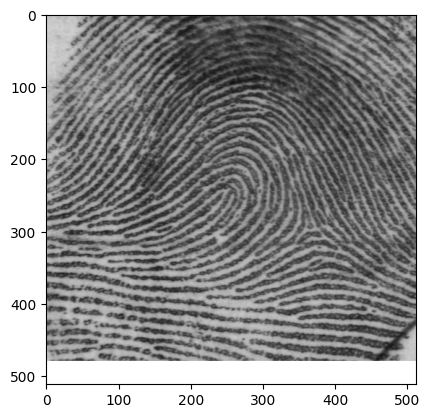

1/1 [==============================] - 0s 32ms/step
Arch:  Tính cách được ví như núi – bền vững. Họ luôn đòi hỏi tính xác thực, có chứng cứ rõ ràng, có khả năng hướng dẫn cho người khác.


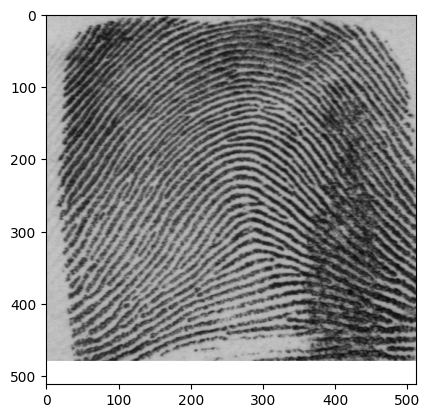

In [40]:
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import matplotlib.pyplot as plt
folder = '/content/drive/MyDrive/test_finger/'
for file in listdir(folder):
  photo = load_img(folder  +  file)
  plt.imshow(photo)
  
  photo = load_img(folder +   file, target_size = (100, 100))
  photo=img_to_array(photo)
  photo =photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  class_name=['0',
              'Whorl-Hoa tay: Đặc điểm là hình xoáy.là người có rất nhiều bạn bè và dễ tiếp xúc kết thân với mọi người người có vân tay này là người cởi mở yêu thiên nhiên dễ gây thiện cảm và gần gũi họ cũng có kỹ năng giao tiếp tốt.',
              'Arch:  Tính cách được ví như núi – bền vững. Họ luôn đòi hỏi tính xác thực, có chứng cứ rõ ràng, có khả năng hướng dẫn cho người khác.',
              'Loop: Tính cách  nhẹ nhàng, thân thiện, linh động, thích nghi tốt và học hỏi nhanh.']
  print(class_name[result])
  plt.show()

In [41]:
model.save('/content/drive/MyDrive/Colab Notebooks/model_fingerprint.h5')